# import + dataset load

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data_cleaning import clean_dataset

PATH = "datasets/employee-churn/churn.csv"
dataset = pd.read_csv(PATH)
dataset = clean_dataset(dataset)

# separate loyal employees from the others

## correlation between numeric column

In [2]:
dataset.corr(numeric_only=True).style.background_gradient(cmap="RdBu", vmin=-1, vmax=1)

,enrollee_id,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target
enrollee_id,1.000000,-0.040455,-0.043359,-0.017848,-0.034695,0.007414,-0.024552,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.059808,0.043123,0.334238,0.081532,0.195289,0.001920,-0.341665
relevent_experience,-0.043359,0.059808,1.000000,0.237202,0.338764,0.118460,0.250279,0.011566,-0.128430
education_level,-0.017848,0.043123,0.237202,1.000000,0.256990,0.136709,0.198297,-0.013742,-0.004372
experience,-0.034695,0.334238,0.338764,0.256990,1.000000,0.117705,0.480192,0.000369,-0.176898
company_size,0.007414,0.081532,0.118460,0.136709,0.117705,1.000000,0.136925,-0.007131,-0.084715
last_new_job,-0.024552,0.195289,0.250279,0.198297,0.480192,0.136925,1.000000,-0.003669,-0.087113
training_hours,0.000998,0.001920,0.011566,-0.013742,0.000369,-0.007131,-0.003669,1.000000,-0.021577
target,0.049475,-0.341665,-0.128430,-0.004372,-0.176898,-0.084715,-0.087113,-0.021577,1.000000


### conclusion

The result are inconclusive, there is no strong correlation between any on the columns with the target column.

## using feature_importance from an ML model

### imports

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
def plot_feature_importance(f, columns):
    f = pd.DataFrame({"Features": columns, "Importance Score": f})
    f = f.sort_values(by="Importance Score", ascending=False)
    print(f.head())
    # plot from most to least important
    f.head(10)[::-1].plot(
        x="Features",
        y="Importance Score",
        kind="barh",
        color="blue",
        edgecolor="k",
        title="Feature Importance",
    )

### exclude categorical columns

                 Features  Importance Score
6          training_hours          0.319266
0  city_development_index          0.274354
3              experience          0.145855
4            company_size          0.118265
5            last_new_job          0.064153


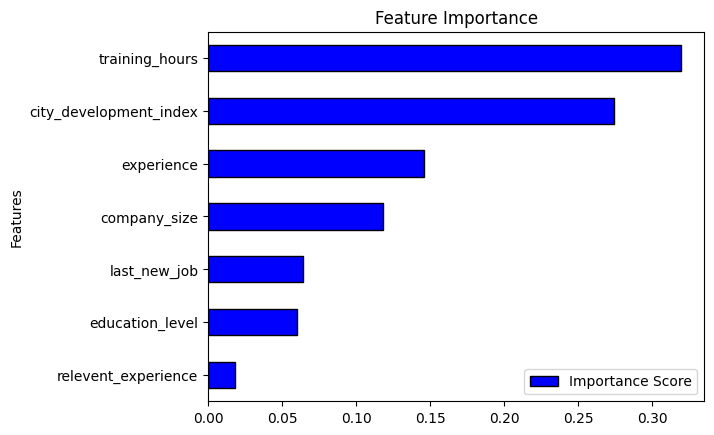

In [5]:
data = dataset.copy()

X = data.drop(columns=["enrollee_id", "target"])
y = data["target"]

categorical_cols = ["city", "gender", "enrolled_university", "major_discipline", "company_type"]
X.drop(categorical_cols, axis=1, inplace=True)

# split the data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

plot_feature_importance(model.feature_importances_, X.columns)